In [826]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("./data/만료및탈퇴회원.csv")

- userid : 인덱스
- gender : 회원아이디
- membertype_codename : 회원구분 코드의 한글명(학교급) ex. 초등
- grade_codename : 학년 코드
- memberstatus : 회원상태 (정회원, 준회원, 탈퇴회원 등)
- memberstatus_codename : 회원상태 코드의 한글명
- memberstatus_change : 월 중 회원상태 변화
- status_null_count : 회원상태 없음 일수
- statusgroup_10_count : 임시회원 일수
- statusgroup_20_count : 무료회원 일수
- statusgroup_30_count : 유료회원 일수
- statusgroup_40_count : 중지회원 일수
- statusgroup_50_count : 만료회원 일수
- statusgroup_90_count : 해지회원 일수
- point_gain_activeday_count : 포인트 획득일수
- point_gain_count : 포인트 획득 횟수
- point_gain : 획득 포인트
- point_loss_activeday_count : 포인트 차감일수
- point_loss_count : 포인트 차감 횟수
- point_loss : 차감 포인트
- tablet_activeday_count : 기기 활성 횟수
- tablet_moved_menu_count : 기기 메뉴이동 횟수
- tablet_leave_count :기기 물리적 종료 횟수
- tablet_resume_count : 기기 물리적 재개 횟수
- tablet_login_count : 로그인 횟수
- tablet_logout_count : 기기 로그아웃 횟수
- study_activeday_count :학습 활성일 횟수
- study_count : 학습 횟수
- study_notcompleted_count : 학습 미완료 횟수
- study_completed_count : 학습 완료 횟수
- study_restart_count : 학습 재시작 횟수
- total_system_learning_time : 학습 시간합계(시스템)
- total_caliper_learning_time : 학습 시간합계(캘리퍼)
- media_activeday_count : 미디어 활동 활성 일수
- media_count : 미디어 학습 횟수
- video_action_count : 비디오 활동 횟수
- video_start_count : 비디오 시작 횟수
- video_restart_count : 비디오 재시작 횟수
- video_pause_count : 비디오 일시정지 횟수
- video_jump_count : 비디오 점프 횟수
- video_resume_count : 비디오 재개(일시정지 후 횟수)
- video_speed_count : 비디오 속도 조절 횟수
- video_volume_count : 비디오 볼륨 조절 횟수
- video_end_count : 비디오 종료 횟수
- test_activeday_count : 평가 활성 일수
- test_count : 평가 횟수
- test_average_score : 평가 평균 점수
- test_item_count : 평가 문항 개수
- test_correct_count : 평가 정답 개수
- wrong_count : 오답 노트 진입 횟수
- wrong_item_count : 오답 노트 문항 개수
- wrong_correct_count : 오답 노트 정답 개수
- yyyy : 년
- mm : 월

In [827]:
print(df.isnull().sum().index)

Index(['Unnamed: 0', 'userid', 'gender', 'membertype_codename',
       'grade_codename', 'memberstatus', 'memberstatus_codename',
       'memberstatus_change', 'status_null_count', 'statusgroup_10_count',
       'statusgroup_20_count', 'statusgroup_30_count', 'statusgroup_40_count',
       'statusgroup_50_count', 'statusgroup_90_count',
       'point_gain_activeday_count', 'point_gain_count', 'point_gain',
       'point_loss_activeday_count', 'point_loss_count', 'point_loss',
       'tablet_activeday_count', 'tablet_moved_menu_count',
       'tablet_leave_count', 'tablet_resume_count', 'tablet_login_count',
       'tablet_logout_count', 'study_activeday_count', 'study_count',
       'study_notcompleted_count', 'study_completed_count',
       'study_restart_count', 'total_system_learning_time',
       'total_caliper_learning_time', 'media_activeday_count', 'media_count',
       'video_action_count', 'video_start_count', 'video_restart_count',
       'video_pause_count', 'video_jump_coun

In [828]:
df.shape

(111851, 55)

In [829]:
# 의미없는 열 삭제
df.drop("Unnamed: 0", axis=1, inplace=True)

In [830]:
df.loc[df["statusgroup_90_count"] != 0, "statusgroup_90_count"].value_counts()

statusgroup_90_count
9     60
16    55
5     48
6     43
2     40
23    37
19    35
12    34
25    32
11    32
3     31
13    31
20    30
1     30
15    29
24    27
29    26
21    26
18    24
4     23
14    23
8     23
22    23
7     22
26    20
28    19
17    18
10    17
30    16
27    12
31     6
Name: count, dtype: int64

In [831]:
df.shape

(111851, 54)

In [832]:
# 탈퇴한 회원 = 1, 그렇지 않으면 0을 저장하는 column 생성
df["is_churned"] = np.where(df["memberstatus"] == 88, 1, 0)

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.]),
 [Text(0, 0.0, '0'),
  Text(0, 20000.0, '20000'),
  Text(0, 40000.0, '40000'),
  Text(0, 60000.0, '60000'),
  Text(0, 80000.0, '80000'),
  Text(0, 100000.0, '100000'),
  Text(0, 120000.0, '120000')])

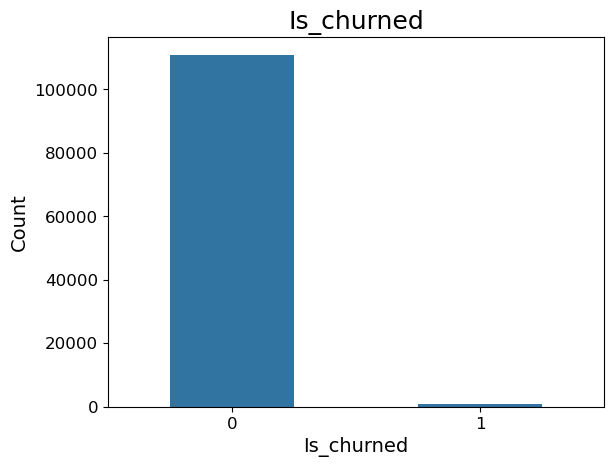

In [833]:
sns.countplot(data=df, x="is_churned", width=0.5)

plt.title("Is_churned", fontsize=18)  # 제목 글자 크기
plt.xlabel("Is_churned", fontsize=14)  # x축 레이블 글자 크기
plt.ylabel("Count", fontsize=14)  # y축 레이블 글자 크기
plt.xticks(fontsize=12)  # x축 눈금 글자 크기
plt.yticks(fontsize=12)  # y축 눈금 글자 크기
# plt.legend(title='Subcategory', fontsize=12, title_fontsize=14)

In [834]:
# features 저장(statusgroup_10_count는 아무도 임시회원이었던 적이 없으므로 포함하지 않음.)
features = [
    "statusgroup_20_count",
    "statusgroup_30_count",
    "statusgroup_40_count",
    "statusgroup_50_count",
]

In [835]:
X = df[features]
y = df["is_churned"]

In [836]:
# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=True, test_size=0.3, random_state=12345
)

In [837]:
# 로지스틱 회귀 모델 사용, 학습
model = LogisticRegression(random_state=12345)
model.fit(X_train, y_train)

LogisticRegression(random_state=12345)

In [838]:
# 예측값 저장
y_pred = model.predict(X_test)

In [839]:
# 학습 데이터 정확도
model.score(X_train, y_train)

0.9955424995210422

In [840]:
# 테스트 데이터 정확도
model.score(X_test, y_test)

0.996632494933842

In [841]:
# 혼동행렬
metrics.confusion_matrix(y_test, y_pred)

array([[33317,     3],
       [  110,   126]], dtype=int64)

In [842]:
# 테스트 데이터의 탈퇴 확률 예측값
y_pred_prob = model.predict_proba(X_test)[:, 1]

y_pred_prob

array([0.0005154 , 0.00016446, 0.0005154 , ..., 0.00107815, 0.00039083,
       0.0005154 ])

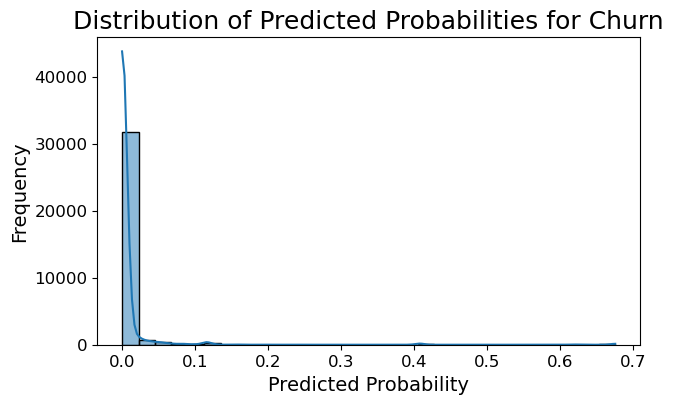

In [843]:
# 탈퇴 확률 예측값 시각화
plt.figure(figsize=(7, 4))
sns.histplot(x=y_pred_prob, bins=30, kde=True)

plt.title("Distribution of Predicted Probabilities for Churn", fontsize=18)
plt.xlabel("Predicted Probability", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)  # x축 눈금 글자 크기
plt.yticks(fontsize=12)

plt.show()

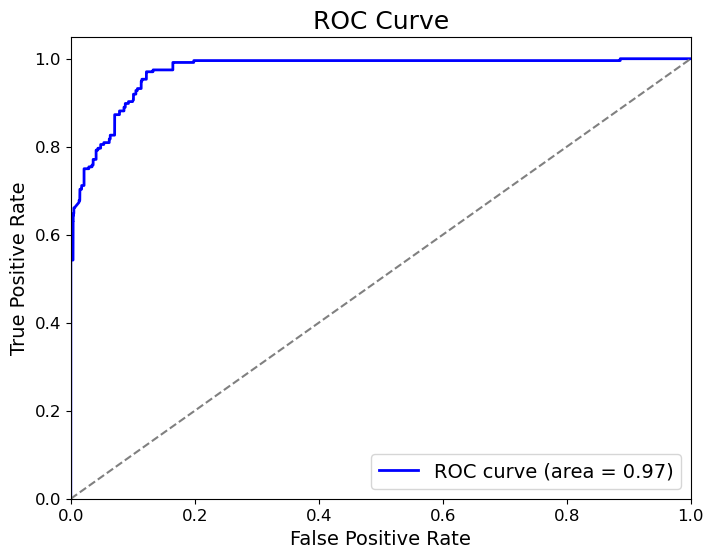

In [844]:
# ROC Curve 시각화
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve", fontsize=18)
plt.legend(loc="lower right", fontsize=14)
plt.xticks(fontsize=12)  # x축 눈금 글자 크기
plt.yticks(fontsize=12)  # y축 눈금 글자 크기
plt.show()

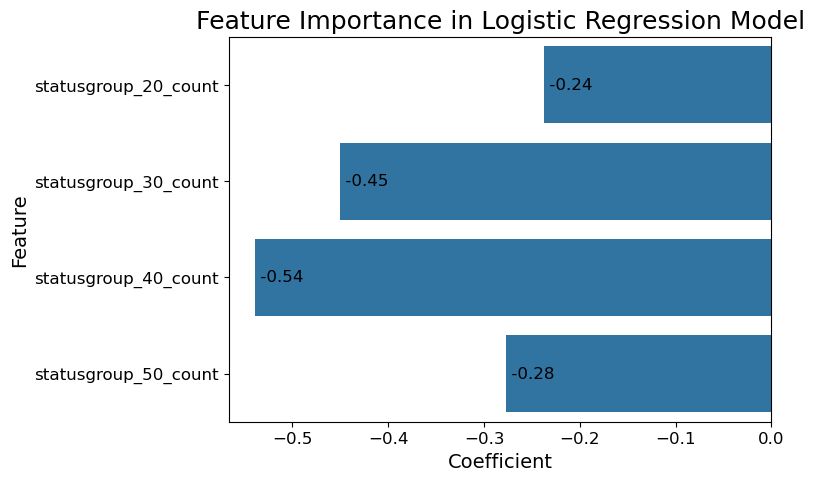

In [845]:
# features importance 시각화
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({"Feature": features, "Coefficient": coefficients})

plt.figure(figsize=(7, 5))
ax = sns.barplot(data=feature_importance, x="Coefficient", y="Feature")
for index, value in enumerate(coefficients):
    ax.text(value, index, f" {value:.2f}", va="center", fontsize=12)
plt.title("Feature Importance in Logistic Regression Model", fontsize=18)
plt.xlabel("Coefficient", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.xticks(fontsize=12)  # x축 눈금 글자 크기
plt.yticks(fontsize=12)  # y축 눈금 글자 크기
plt.show()

In [846]:
# 탈퇴확률 -> 탈퇴하지 않을 확률로 변경
df["is_retained"] = df["is_churned"].apply(lambda x: 1 if x == 0 else 0)

In [847]:
# features, target
features2 = [
    "statusgroup_20_count",
    "statusgroup_30_count",
    "statusgroup_40_count",
    "statusgroup_50_count",
]

target2 = "is_retained"

X2 = df[features2]
y2 = df[target2]

In [848]:
# 5. 학습용/테스트용 데이터 분할
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, shuffle=True, test_size=0.3, random_state=12345
)

In [849]:
# 7. 로지스틱 회귀 모델 학습
model2 = LogisticRegression(random_state=12345)
model2.fit(X2_train, y2_train)

LogisticRegression(random_state=12345)

In [850]:
# 예측값 저장, 서비스 유지 확률 저장
y2_pred = model2.predict(X2_test)
y2_pred_prob = model2.predict_proba(X2_test)[:, 1]

In [851]:
# 정확도와 분류 보고서 출력
print(metrics.accuracy_score(y2_test, y2_pred))
print(metrics.classification_report(y2_test, y2_pred))

0.996632494933842
              precision    recall  f1-score   support

           0       0.98      0.53      0.69       236
           1       1.00      1.00      1.00     33320

    accuracy                           1.00     33556
   macro avg       0.99      0.77      0.84     33556
weighted avg       1.00      1.00      1.00     33556



In [852]:
# 혼동 행렬
metrics.confusion_matrix(y2_test, y2_pred)

array([[  126,   110],
       [    3, 33317]], dtype=int64)

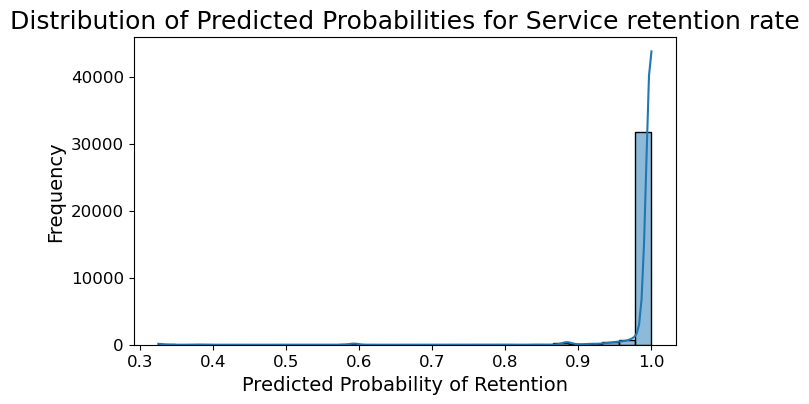

In [853]:
# 예측 확률 시각화
plt.figure(figsize=(7, 4))
sns.histplot(x=y2_pred_prob, bins=30, kde=True)
plt.title(
    "Distribution of Predicted Probabilities for Service retention rate", fontsize=18
)
plt.xlabel("Predicted Probability of Retention", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)  # x축 눈금 글자 크기
plt.yticks(fontsize=12)  # y축 눈금 글자 크기
plt.show()

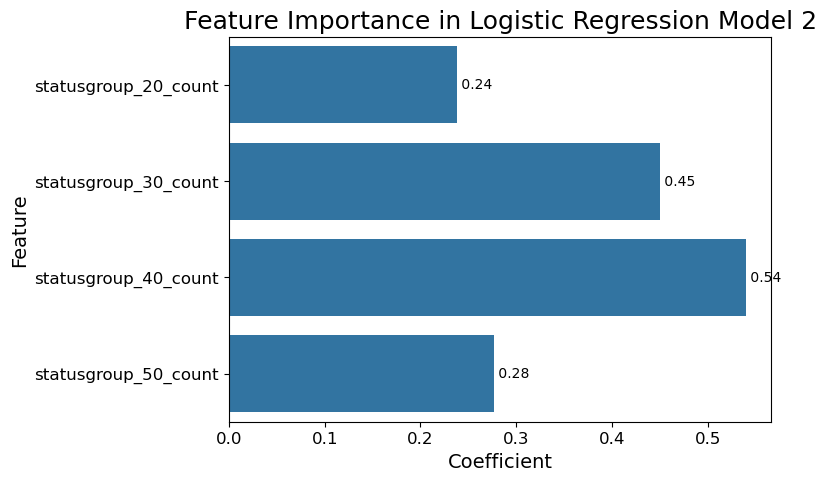

In [854]:
# features importance 시각화
coefficients2 = model2.coef_[0]
feature_importance2 = pd.DataFrame({"Feature": features2, "Coefficient": coefficients2})

plt.figure(figsize=(7, 5))
ax = sns.barplot(x="Coefficient", y="Feature", data=feature_importance2)
for index, value in enumerate(coefficients2):
    ax.text(value, index, f" {value:.2f}", va="center")
plt.title("Feature Importance in Logistic Regression Model 2", fontsize=18)
plt.xlabel("Coefficient", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.xticks(fontsize=12)  # x축 눈금 글자 크기
plt.yticks(fontsize=12)  # y축 눈금 글자 크기
plt.show()

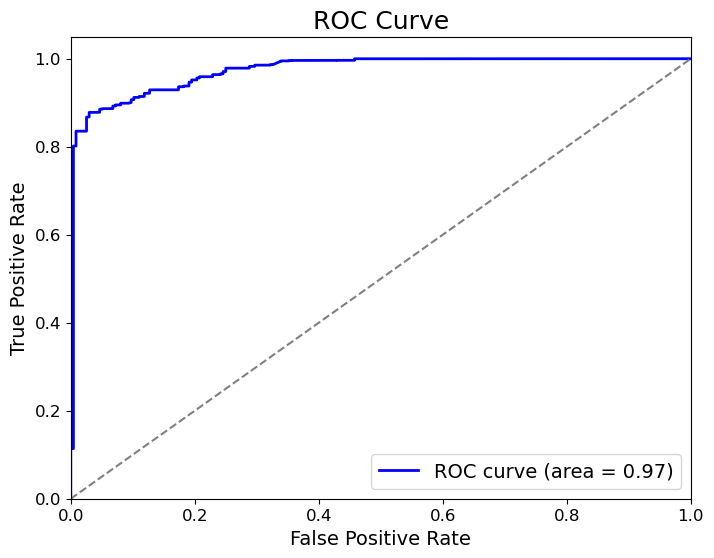

In [855]:
# ROC Curve 시각화
fpr, tpr, _ = metrics.roc_curve(y2_test, y2_pred_prob)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve", fontsize=18)
plt.legend(loc="lower right", fontsize=14)
plt.xticks(fontsize=12)  # x축 눈금 글자 크기
plt.yticks(fontsize=12)  # y축 눈금 글자 크기
plt.show()